In [38]:
import time
import numpy as np
from keras.utils import np_utils
import keras.callbacks as cb
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
import feather 
from mailerWithUtf8 import mail
from sklearn.preprocessing import LabelEncoder
from keras.models import model_from_json

In [100]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# preprocess load data

In [39]:
start_time = time.time()
path = 'C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/0710_marketing_train.feather' 
# path = 'C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/0710_marketing_train_sample.feather' 
train_df = feather.read_dataframe(path)
print('load feather %s seconds', format(time.time() - start_time))


load feather %s seconds 1.5008654594421387


In [40]:
start_time = time.time()
path = 'C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/0710_marketing_test.feather'
# path = 'C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/0710_marketing_test_sample.feather' 

test_df = feather.read_dataframe(path)
print('load feather %s seconds', format(time.time() - start_time))

load feather %s seconds 0.3840045928955078


In [42]:
train_x, train_y = train_df.iloc[:, 0:-1].values, train_df.iloc[:, -1].values

In [43]:
test_x, test_y = test_df.iloc[:, 0:-1].values, test_df.iloc[:, -1].values

In [44]:
train_x = train_x.reshape(train_x.shape[0], -1)   # normalize
test_x = test_x.reshape(test_x.shape[0], -1)   # normalize



In [45]:
# from sklearn.preprocessing import LabelBinarizer
# encoder = LabelBinarizer()
# y_train = encoder.fit_transform(y_train)
# y_test = encoder.fit_transform(y_test)

In [46]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(train_y)
encoded_Y = encoder.transform(train_y)
# convert integers to dummy variables (i.e. one hot encoded)
train_y = np_utils.to_categorical(encoded_Y)

encoded_Y = encoder.transform(test_y)
# convert integers to dummy variables (i.e. one hot encoded)
test_y = np_utils.to_categorical(encoded_Y)

In [47]:
# get y unique name
encoder.classes_

array(['Adult', 'Game', 'HomeLife', 'Infrequent Internet User',
       'InstantMessage-High', 'InstantMessage-Low', 'Map', 'News',
       'No significant preference', 'Portal', 'Social-media'], dtype=object)

In [48]:
len(train_y)

1506103

In [49]:
len(test_y)

376526

# construct and compile model

In [87]:
classify_num = 11
epochs = 300
batch = 128

# basic config

In [88]:
start_time = time.time()
print ('Compiling Model ... ')
model = Sequential()
model.add(Dense(1024, input_shape=train_x[0].shape ))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(classify_num))
model.add(Activation('softmax'))

rms = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])

print('Model compield in {0} seconds'.format(time.time() - start_time))


Compiling Model ... 
Model compield in 0.10134553909301758 seconds


# Train model

In [89]:
start_time = time.time()
print('Training model...')
model.fit(train_x, train_y , epochs=epochs, batch_size=batch,
          shuffle=True,validation_split=0.1, verbose=2)
print("Training duration : {0}".format(time.time() - start_time))


Training model...
Train on 1355492 samples, validate on 150611 samples
Epoch 1/300
59s - loss: 1.9602 - acc: 0.2956 - val_loss: 1.9214 - val_acc: 0.3046
Epoch 2/300
60s - loss: 1.9184 - acc: 0.3058 - val_loss: 1.9334 - val_acc: 0.3069
Epoch 3/300
60s - loss: 1.9121 - acc: 0.3084 - val_loss: 1.9139 - val_acc: 0.3117
Epoch 4/300
61s - loss: 1.9096 - acc: 0.3095 - val_loss: 1.9254 - val_acc: 0.3103
Epoch 5/300
60s - loss: 1.9067 - acc: 0.3102 - val_loss: 1.9091 - val_acc: 0.3084
Epoch 6/300
59s - loss: 1.9053 - acc: 0.3110 - val_loss: 1.9155 - val_acc: 0.3064
Epoch 7/300
59s - loss: 1.9027 - acc: 0.3116 - val_loss: 1.9000 - val_acc: 0.3143
Epoch 8/300
59s - loss: 1.9014 - acc: 0.3117 - val_loss: 1.9025 - val_acc: 0.3136
Epoch 9/300
59s - loss: 1.9009 - acc: 0.3123 - val_loss: 1.9148 - val_acc: 0.3119
Epoch 10/300
59s - loss: 1.8989 - acc: 0.3123 - val_loss: 1.9105 - val_acc: 0.3069
Epoch 11/300
59s - loss: 1.8974 - acc: 0.3130 - val_loss: 1.8988 - val_acc: 0.3103
Epoch 12/300
59s - loss: 

60s - loss: 1.9249 - acc: 0.3142 - val_loss: 1.9481 - val_acc: 0.3101
Epoch 100/300
59s - loss: 1.9216 - acc: 0.3136 - val_loss: 1.9642 - val_acc: 0.3000
Epoch 101/300
61s - loss: 1.9447 - acc: 0.3137 - val_loss: 1.9239 - val_acc: 0.3128
Epoch 102/300
60s - loss: 1.9167 - acc: 0.3140 - val_loss: 1.9889 - val_acc: 0.3017
Epoch 103/300
59s - loss: 1.9171 - acc: 0.3142 - val_loss: 1.9140 - val_acc: 0.3137
Epoch 104/300
60s - loss: 1.9182 - acc: 0.3141 - val_loss: 1.9168 - val_acc: 0.3132
Epoch 105/300
61s - loss: 1.9338 - acc: 0.3137 - val_loss: 1.9675 - val_acc: 0.3147
Epoch 106/300
64s - loss: 1.9161 - acc: 0.3142 - val_loss: 1.9543 - val_acc: 0.3073
Epoch 107/300
59s - loss: 1.9187 - acc: 0.3145 - val_loss: 1.9173 - val_acc: 0.3168
Epoch 108/300
59s - loss: 1.9256 - acc: 0.3137 - val_loss: 2.0830 - val_acc: 0.3160
Epoch 109/300
58s - loss: 1.9373 - acc: 0.3146 - val_loss: 1.9584 - val_acc: 0.3168
Epoch 110/300
60s - loss: 1.9337 - acc: 0.3141 - val_loss: 1.9373 - val_acc: 0.3170
Epoch 

61s - loss: 2.0129 - acc: 0.3123 - val_loss: 2.0359 - val_acc: 0.3073
Epoch 198/300
62s - loss: 1.9518 - acc: 0.3137 - val_loss: 1.9856 - val_acc: 0.3118
Epoch 199/300
59s - loss: 1.9765 - acc: 0.3131 - val_loss: 1.9858 - val_acc: 0.3177
Epoch 200/300
59s - loss: 1.9749 - acc: 0.3134 - val_loss: 2.0079 - val_acc: 0.3094
Epoch 201/300
60s - loss: 1.9458 - acc: 0.3140 - val_loss: 1.9603 - val_acc: 0.3109
Epoch 202/300
60s - loss: 1.9540 - acc: 0.3136 - val_loss: 1.9245 - val_acc: 0.3152
Epoch 203/300
59s - loss: 1.9531 - acc: 0.3143 - val_loss: 1.9470 - val_acc: 0.3168
Epoch 204/300
60s - loss: 1.9485 - acc: 0.3144 - val_loss: 1.9327 - val_acc: 0.3160
Epoch 205/300
58s - loss: 1.9477 - acc: 0.3139 - val_loss: 1.9426 - val_acc: 0.3134
Epoch 206/300
59s - loss: 1.9496 - acc: 0.3140 - val_loss: 1.9455 - val_acc: 0.3146
Epoch 207/300
60s - loss: 1.9358 - acc: 0.3146 - val_loss: 1.9216 - val_acc: 0.3166
Epoch 208/300
60s - loss: 1.9350 - acc: 0.3149 - val_loss: 1.9972 - val_acc: 0.3120
Epoch 

61s - loss: 1.9778 - acc: 0.3150 - val_loss: 1.9967 - val_acc: 0.2981
Epoch 296/300
60s - loss: 1.9515 - acc: 0.3153 - val_loss: 2.0047 - val_acc: 0.3075
Epoch 297/300
62s - loss: 1.9651 - acc: 0.3147 - val_loss: 1.9758 - val_acc: 0.3103
Epoch 298/300
60s - loss: 1.9630 - acc: 0.3145 - val_loss: 1.9679 - val_acc: 0.3091
Epoch 299/300
58s - loss: 1.9658 - acc: 0.3145 - val_loss: 1.9366 - val_acc: 0.3081
Epoch 300/300
60s - loss: 1.9602 - acc: 0.3140 - val_loss: 1.9492 - val_acc: 0.3060
Training duration : 18019.46417737007


In [90]:
train_time = time.time() - start_time

# save model

In [91]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 


Saved model to disk


# test model and get accuracy

In [92]:
test_batch = 32
loss, accuracy = model.evaluate(test_x, test_y, batch_size=test_batch)

376448/376526 [============================>.] - ETA: 0s

In [93]:
print("%s: %.2f%%" % (model.metrics_names[1], accuracy*100))


acc: 30.68%


# send mail to alert

In [94]:
model_config = []
for index, layer in enumerate(model.get_config()):
    model_config.append("layer - > %d===============" % index)
    model_config.append("class_name = " + layer["class_name"] )
    if(str(layer["config"].get("units", "None")) != "None"):
        model_config.append("units = " + str(layer["config"].get("units", "None")))
    if(str(layer["config"].get("activation", "None")) != "None"):
        model_config.append("activation = " + layer["config"]["activation"])
    if(str(layer["config"].get("rate", "None")) != "None"):
        model_config.append("rate = " + str(layer["config"]["rate"]))
model_info = '\n'.join(model_config)

In [95]:
model_info += "\n\ntrain epochs = " + str(epochs)
model_info += "\ntrain batch = " + str(batch)
model_info += "\ntest batch = " + str(test_batch)
model_info += "\ntrain time = " + str(train_time)
model_info += "\nloss = " + str(loss)
model_info += "\n\n\naccuracy = " + str(accuracy)



In [96]:
test=mail()
test.main("model finished", model_info)

Start Send Mail
User Email : a - DONE 
User Email : a - DONE 
User Email : 2 - DONE 
User Email : 6 - DONE 
User Email : 3 - DONE 
User Email : 6 - DONE 
User Email : 5 - DONE 
User Email : 5 - DONE 
User Email : 6 - DONE 
User Email : 6 - DONE 
User Email : @ - DONE 
User Email : g - DONE 
User Email : m - DONE 
User Email : a - DONE 
User Email : i - DONE 
User Email : l - DONE 
User Email : . - DONE 
User Email : c - DONE 
User Email : o - DONE 
User Email : m - DONE 
Finish Send Mail


# write readme to report the model

In [97]:
md_info = model_info.replace("\n", "<br>")
with open('readme.md', 'w+') as f:
     f.write(md_info)
f.closed

True

In [98]:
print(model_info)

layer - > 0===============
class_name = Dense
units = 1024
activation = linear
layer - > 1===============
class_name = Dense
units = 512
activation = linear
layer - > 2===============
class_name = Activation
activation = relu
layer - > 3===============
class_name = Dense
units = 256
activation = linear
layer - > 4===============
class_name = Activation
activation = relu
layer - > 5===============
class_name = Dense
units = 128
activation = linear
layer - > 6===============
class_name = Activation
activation = relu
layer - > 7===============
class_name = Dense
units = 64
activation = linear
layer - > 8===============
class_name = Activation
activation = relu
layer - > 9===============
class_name = Dense
units = 32
activation = linear
layer - > 10===============
class_name = Activation
activation = relu
layer - > 11===============
class_name = Dense
units = 11
activation = linear
layer - > 12===============
class_name = Activation
activation = softmax

train epochs = 300
train batch = 12

In [99]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [101]:
pred = model.predict(test_x)

In [102]:
cnf_matrix = confusion_matrix(np.argmax(test_y, axis = 1), np.argmax(pred, axis = 1))
cnf_matrix

array([[    1,     0,     0,   197,  2382,  4635,     7,     0,  3658,
            0,     0],
       [    1,     0,     0,   765,  5788,  7859,    19,     0,  2859,
            0,     0],
       [    1,     0,     0,   238,  2649,  9530,     9,     0,  2603,
            0,     0],
       [    0,     0,     0, 12845, 13822,  1073,    63,     0,  1162,
            0,     0],
       [    0,     0,     0,  4047, 36459, 39343,   307,     0,  4766,
            0,     0],
       [    0,     0,     1,  1428, 23119, 54326,   133,     0,  7170,
            0,     0],
       [    0,     0,     0,    28,  2006, 18776,    41,     0,   170,
            0,     0],
       [    0,     0,     0,   669,  4942,  4170,    11,     0,  1582,
            0,     0],
       [    3,     0,     5,  2082, 15544, 23865,    63,     0, 11842,
            0,     0],
       [    0,     0,     0,  1083,  6813,  5826,    15,     0,  5830,
            0,     0],
       [    0,     0,     0,   992, 12217, 11531,    30,    

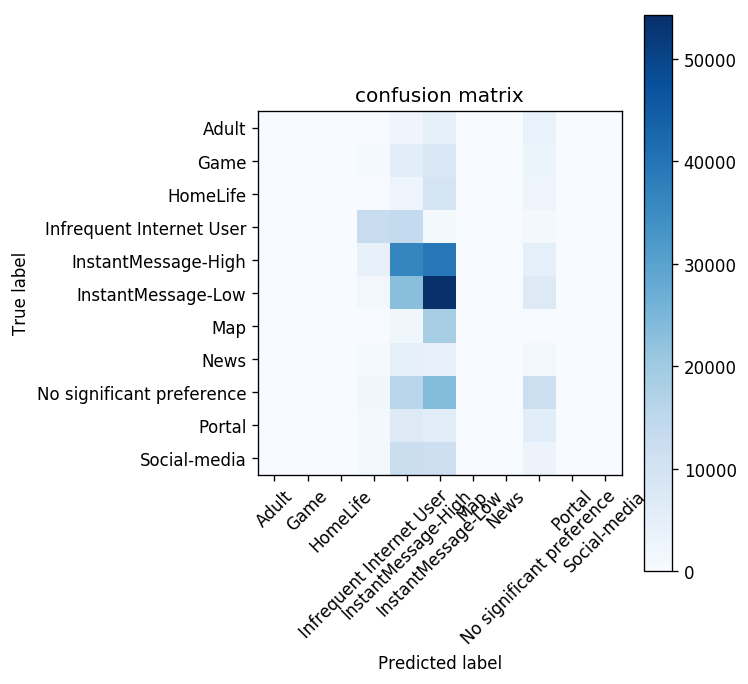

In [103]:
np.set_printoptions(precision=2)
plt.figure(figsize=(6, 6), dpi = 120)
plot_confusion_matrix(cnf_matrix, classes=encoder.classes_, normalize=True, title='confusion matrix')
plt.show()

In [110]:
# for i in range(10):
#     probabilities = model.predict(test_x[i:i+1,:], batch_size=32, verbose=0)
#     probabilities = model.predict(test_x[i:i+1,:])
#     probabilities = model.predict(test_x)
#     probabilities[probabilities>=0.5] = 1
#     probabilities[probabilities<0.5] = 0
#     print(probabilities)

[[ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
